### Introduction

In the previous section we learned about gradient descent.  We said that our technique was to choose a slope and y-intercept values of a regression line.  Then to use the residual sum of squares (RSS) to distill the goodness of fit into one number.  

From there, we step by step find the "best fit" regression line by doing the following:
* Adjust $b$ and $m$, as these are the only things that can vary in a single-variable regression line.
* Adjust these values using our regression formula 

The heart of our regression formula was the following: 

```python
learning_rate = .0001
n = len(updated_shows)
b_gradient = 0
m_gradient = 0 
for i in range(len(points)):
    b_gradient += -(1/n)*(error_at_point_x)
    m_gradient += -(1/n)*(error_at_point_x*x)

new_b = b_current - (learningRate * b_gradient)
new_m = m_current - (learningRate * m_gradient)
```

In this section we will try to unpack where this value comes from.

### Graphical Understanding

As we saw in the previous section, we can think of the gradient descent as giving us a direction to move in, giving different values of x and y. Remember that with gradient descent, it is almost like we are standing on at a point on the 3d curve below.  Now we can stand along the curve but we cannot see where the minimum is -- except for the point we are standing on, every other point in the graph is invisible.  Our goal is to find the minimum.



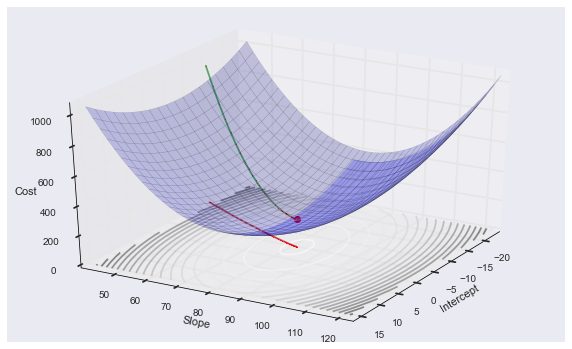

Now, how would we figure out how to move towards the point that produces the minimum error, if we cannot see any of the other points except for what we are standing on?  Well, we can feel what is downhill - we can feel the slope of the line.  So with every step we want to keep moving in the direction that our slope points downhill.  In fact we want to point in the direction that produces the most downhill.

The direction that moves most downhill is a line tangent to the graph.  And lucky for us, there are mathematical formulas for calculating the tangent line.

## Talking about derivatives

To get into these calculations, let's move back to a two dimensional graph, and move back to seeing how our cost curve changes with altering just the values of b.

So imagine that as we changed the value of b, our cost curve looked like the following.  The tangent line, is similar to the orange line.

In [146]:
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from IPython.display import display, HTML

init_notebook_mode(connected=True)
layout = dict(title = 'Error Values For line')
b_values = list(range(0, 20, 1))
error_values = list(map(lambda b_value: b_value**2,b_values))
trace0 = go.Scatter(
    x = b_values,
    y = error_values,
    name = 'markers'
)


def generate_trace():
    ### The Important Part
    tangent_x_start = 10
    tangent_y_start = tangent_x_start**2
    tangent_x_end = 11
    tangent_y_end = (tangent_x_end)**2

    return go.Scatter(
        x = [tangent_x, tangent_x_end],
        y = [tangent_y, tangent_y_end]
    )


data = [trace0, generate_trace()]
fig = dict(data=data, layout=layout)
iplot(fig)

By tangent line at a point x, we mean the line that just touches our curve.  Looking at the orange line, it touches from points 10 to 12.  Now notice that by decreasing the `delta_x` value in the graph generated above, that the line becomes less curved and more straight.  Now the tangent line tells us something important: the slope of the tangent line is the amount represents the change in y for a small change in x.    

We call this value the derivative.  Now the cost curve above is the the formula error = b^2.  Let's say that error = e, just to make our denotation easier. 

That is, when b is 1, y = 1, when b = 2, e = 4, when b = 3, e = 9, and so on.  Ok, and what is our derivative at different values of b?  Well notice that the slope of the tangent line when b = 10 is larger than the slope of our tangent line when b = 4.  You can see that by remembering that slope is simply rise over run.  So the tangent line when b = 10 seems like it would cross 144 at point b = 12.  In other words, at point x = 10

de/db = (change in e )/(change in b) = (144 - 100)/(12 - 10) = 22


And at point x = 2

de/db = (change in e )/(change in b) = (16 - 4)/(4 - 2) = 6

> When you see de/db, it does not mean division, it used to denote derivative.  Or more directly, the change in e with respect to a change in b.  You can read this as delta e over delta b, which means the same thing.  Often you will see, dy/dx, which simply means the change in y given a small change in x, or derivative of y with respect to x.

So you can see just from the estimates above that this derivative is not a constant number, the further away from x that we move, the higher our derivative.

### Our rules for calculating the derivative

From the above section you know that the derivative is equal to the slope of the tangent line along a graph.  The importance of the derivative is that it tells us the rate of change at a given point.  Or in the context of our cost curve, how much will our error change with a nudge of one of our values.

The derivative is the change in the value of an output with an infintessimally small increase of an input.  Notice that, the numbers we used above in calculating our derivative above were not very good.  The reason is because we had a change of x of about 2, that is way too large.  The change in x should be much less than one -- instead, .0001 is more like it. 

Luckily for us, we can follow some simple rules for calculating the derivative.

##### The power rule

The first rule for us to learn is the power rule.  The power rule states that given a function $f(x) = x^r$ then the derivative of $f(x)$, denoted $f'(x)$ is:

$ f'(x) = r*x^r-1 $

So for example, with the function above, $f(x) = x^2 $, so this means that $f'(x) = 2*x^{2-1} = 2*x^1 = 2*x$.  Another way to read this is that a small increase in x will produce an increase in y equal to 2 times the x value.  So when x = 2, we solve for the derivative at that point by simply plugging in 2 whenever we see x.  This gives us $f'(2) = 2*2 = f'(2) = 4 $.  And when x = 10, then $f'(10) = 2*10 = 20$.  So our calculations from above were close, but these are more accurate.  The derivative of $f(x) = x^2$ is $2*x$.

We won't prove the power rule here.  But hopefully you can see that it does seem to fit our view of $f(x) = x^2$ well.  It seems reasonable that the slope of the line tangent to a curve is $2*x$.  For example, let's assume that our error changes in the following as we change b, e = 3b.  Now a plot of e = 3b, looks like the following:

In [154]:
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from IPython.display import display, HTML

init_notebook_mode(connected=True)
layout = dict(title = 'Error Values For line f(b) = 3*b')
b_values = list(range(0, 20, 1))
error_values = list(map(lambda b_value: b_value*3,b_values))
trace0 = go.Scatter(
    x = b_values,
    y = error_values,
    name = 'markers'
)





data = [trace0]
fig = dict(data=data, layout=layout)
iplot(fig)

Notice that for the line e = 3b, the derivative is constant.  That is the rate of change in our function is stable for all values of x.  Unlike where $e = b^2$, and the slope constantly changed, here a nudge in the b direction will produce the same increase in the output, regardless of where we are on the curve.  For example, when b = 8, we can see the following: 

$ de/db = 24.0003 - 24/(8.0001 - 8) = .0003/.0001 = 3 $

Note that our power rule also gives us a derivative of 3.

$f(b) = 3b = 3b^1$ 

$f'(b) = 1*3b^{1-1} = 3b^{0} = 3$

So our power rule shows that a change in b should produce a proportional increase of 3 times that change in our error.  And this is always the case for this error curve.

One more, let's consider that our function is the following: 

$f(b) = 1000$

In that case, our function is simply a constant line, no matter what the value of b, our error is always 1000.

In [155]:
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from IPython.display import display, HTML

init_notebook_mode(connected=True)
layout = dict(title = 'Error Values For line f(b) = 1000')
b_values = list(range(0, 20, 1))
error_values = list(map(lambda b_value: 1000,b_values))
trace0 = go.Scatter(
    x = b_values,
    y = error_values,
    name = 'markers'
)





data = [trace0]
fig = dict(data=data, layout=layout)
iplot(fig)

Note that here, the change in the error as we change b is always the same: 0.

So when f(b) = 1000, f'(b) = 0.  In fact, if the function is any constant, then the derivative of that function is zero. 

##### The constant factor rule

The above made use of the constant factor rule.  The constant factor addresses how to take the derivative of a function multiplied by a constant. So in the above example, we had that with our function of $f(b) = 3*x$.  Now, the derivative of that function is the same as $ 3 * de/db(b) $ leading to $ 3*1 $ as we simply apply the power rule to b.

In the general case, we can say, consider the function $a*f(b)$ where $a$ is a number.  Then the derivative $db/de(a*f(b)) = a * db/de(f(b) $.  

Don't let the fancy equations confuse you.  The rule simply says to focus on the taking the derivative of the variable, and if it was multiplied by a number, then multiply that derivative of that by the same number.

So if $f(b) = 2*b^2 $ this means that $f'(b) = 2*2*b $.  The constant factor rule in action.

##### The addition rule

Now consider that we receive a function like the following: 
    
$ f(b) = 4b^3 - b^2 + 3b $

First, we say that this function has two terms.  A term is a constant or variable that is separated by a plus or minus sign.  Ok, so to take a derivative of a function that has multiple terms, simply take the derivative of each of the terms individually.  So $ f'(b) = 12b^2 - 2b + 3  $.  Do you see what we did there, we simply applied our previous rules to each of the terms individually and continued to add or subtract the terms accordingly.

### Summary

In this section we saw that we can find the minimum error by following the line tangent to a graph.  And we can move along by following the line tangent to the spot we are currently located.  We then saw how this holds for a two-dimensional graph, by considering how our error changes with respect to a change in b.  We identified this change in output from an infintesimally small change in input as our derivative.  

Then we considered three rules that allow us to calculate our derivative.  The most tricky of these is the power rule, which says that if $f(b) = b^n$, then $ f'(b) = n * b^{n -1} $.  We still haven't seen how derivativesgive us a way to understand gradient descent, but we will shortly when we consider how to take derivatives when we have functions with multiple variables, like an error function that is dependent on both m and b.

But first, let's practice what we know about derivatives in a lab.